### Numpy

In [95]:
import numpy as np
persontype=np.dtype({
    'names':['name', 'age', 'chinese', 'math','english'],
    'formats':['S32','i','i','i','f']})
peoples=np.array([("ZhangFei",32,75,100, 90),("GuanYu",24,85,96,88.5),
       ("ZhaoYun",28,85,92,96.5),("HuangZhong",29,65,85,100)],dtype=persontype)
print(peoples)

[(b'ZhangFei', 32, 75, 100,   90. ) (b'GuanYu', 24, 85,  96,   88.5)
 (b'ZhaoYun', 28, 85,  92,   96.5) (b'HuangZhong', 29, 65,  85,  100. )]


In [64]:
grade_max=[]
grade_min=[]
grade_avg=[]
grade_var=[]
grade_std=[]
for subject in ['chinese','math','english']:
    grade_max.append(peoples[subject].max())
    grade_min.append(peoples[subject].min())
    grade_avg.append(peoples[subject].mean())
    grade_var.append(peoples[subject].var())
    grade_std.append(peoples[subject].std())

In [65]:
peoples

array([(b'ZhangFei', 32, 75, 100,   90. ),
       (b'GuanYu', 24, 85,  96,   88.5), (b'ZhaoYun', 28, 85,  92,   96.5),
       (b'HuangZhong', 29, 65,  85,  100. )],
      dtype=[('name', 'S32'), ('age', '<i4'), ('chinese', '<i4'), ('math', '<i4'), ('english', '<f4')])

In [88]:
n=len(peoples)
score=np.zeros((n,1))
for i in range(n):
    for subject in ['chinese','math','english']:
        score[i]=score[i]+peoples[i][subject]
# print(np.sort(score,axis=0))
print(score)

[[ 265. ]
 [ 269.5]
 [ 273.5]
 [ 250. ]]


In [4]:
import numpy as np
a = np.array([[4,3,2],[2,4,1]])
np.sort(a,axis=1)


array([[2, 3, 4],
       [1, 2, 4]])

In [94]:
people=np.array([["ZhangFei",32,75,100, 90],["GuanYu",24,85,96,88.5],
       ["ZhaoYun",28,85,92,96.5],["HuangZhong",29,65,85,100]])
people_grade_added=np.insert(people,5,values=score.reshape(1,4),axis=1)

array([['ZhangFei', '32', '75', '100', '90', '265.0'],
       ['GuanYu', '24', '85', '96', '88.5', '269.5'],
       ['ZhaoYun', '28', '85', '92', '96.5', '273.5'],
       ['HuangZhong', '29', '65', '85', '100', '250.0']],
      dtype='<U10')

### Pandas

In [105]:
import pandas as pd
data = {'Chinese': [66, 95, 93, 90,80],'English': [65, 85, 92, 88, 90],'Math': [30, 98, 96, 77, 90]}
df2 = pd.DataFrame(data, index=['ZhangFei', 'GuanYu', 'ZhaoYun', 'HuangZhong', 'DianWei'], columns=['English', 'Math', 'Chinese'])
df2

,English,Math,Chinese
ZhangFei,65,30,66
GuanYu,85,98,95
ZhaoYun,92,96,93
HuangZhong,88,77,90
DianWei,90,90,80


In [111]:
def plus(data,m,n):
    data['new1']=(data['Math']+data['English'])*m
    data['new2']=(data['Math']+data['English'])*n
    return data
df2.apply(plus,axis=1,args=(2,3))


,English,Math,Chinese,new1,new2
ZhangFei,65,30,66,190,285
GuanYu,85,98,95,366,549
ZhaoYun,92,96,93,376,564
HuangZhong,88,77,90,330,495
DianWei,90,90,80,360,540


### pandasql

In [118]:
from pandasql import sqldf
df1=pd.DataFrame({'names':['zhang','liu','a','b','c'],'data1':range(5)})
pysql=lambda sql:sqldf(sql,globals())
sql='select * from df1'
print(pysql(sql))
# sqldf(sql)

   data1  names
0      0  zhang
1      1    liu
2      2      a
3      3      b
4      4      c


In [128]:
def grade_sum(df):
    df['sum']=df['Chinese']+df['English']+df['Math']
    return df
df2.apply(grade_sum,axis=1)

,English,Math,Chinese,sum
ZhangFei,65,30,66,161
GuanYu,85,98,95,278
ZhaoYun,92,96,93,281
HuangZhong,88,77,90,255
DianWei,90,90,80,260


## python爬虫

### json格式

In [6]:
import requests
r = requests.get('http://www.douban.com')
# r.text
# r.content

In [21]:
#定位到 HTML 中的所有列表项目

html="http://pyecharts.org/#/zh-cn/charts_base"
from lxml import etree
html = etree.HTML(html)
result = html.xpath('//li')
result

[]

In [9]:
import json
jsonData = '{"a":1,"b":2,"c":3,"d":4,"e":5}'
input = json.loads(jsonData)
# type(input)
print(input)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}


In [24]:
jsonData

'{"a":1,"b":2,"c":3,"d":4,"e":5}'

In [28]:
import pandas as pd
from pandas import DataFrame
pd.DataFrame(input,index=['a'])

,a,b,c,d,e
a,1,2,3,4,5


In [15]:
# coding:utf-8
query = '王凯'
'''下载图片'''
def download(src,id):
    dir='./Desktop/images/'+str(id)+'.jpg'
    try:
        pic=requests.get(src,timeout=1000)
    except requests.exceptions.ConnectionError:
        print('无法下载')
    fp=open(dir,'wb')
    fp.write(pic.content)
    fp.close

In [40]:
'''循环'''
for i in range(0,20,20):
    url='https://www.douban.com/j/search_photo?q='+query+'&limit=20&start='+str(i)
    html=requests.get(url).text
    response=json.loads(html,encoding='utf-8')
    for image in response['images']:
        download(image['src'],image['id'])

### Xpath

In [8]:
src_path="//div[@class='item-root']/a[@class='cover-link']/img[@class='cover']/@src"
title_path="//div[@class='item-root']/div[@class='detail']/div[@class='title']/a[@class='title-text']"

In [10]:
'''循环'''
from selenium import webdriver
from lxml import etree

query = '曹保平'
for i in range(0,30,15):
    url="https://movie.douban.com/subject_search?search_text="+query+"&cat=1002&start="+str(i)
    driver = webdriver.Chrome()
# executable_path='/Users/rickie/Downloads/chromedriver'
    driver.get(url)
    html = etree.HTML(driver.page_source)
    
srcs = html.xpath(src_path)
titles = html.xpath(title_path)
for src, title in zip(srcs, titles):
    download(src, title.text)


In [19]:
query = '曹保平'

url="https://movie.douban.com/subject_search?search_text="+query+"&cat=1002&start="+str(0)
driver = webdriver.Chrome()
# executable_path='/Users/rickie/Downloads/chromedriver'
driver.get(url)
html = etree.HTML(driver.page_source)

srcs = html.xpath(src_path)
titles = html.xpath(title_path)
for src, title in zip(srcs, titles):
    download(src, title.text)

https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p1513235776.32.webp:曹保平 Baoping Cao
https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2540513831.webp:狗十三‎ (2013)
https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2262236348.webp:烈日灼心‎ (2015)
https://img1.doubanio.com/view/photo/s_ratio_poster/public/p499462449.webp:李米的猜想‎ (2008)
https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2375882763.webp:追凶者也‎ (2016)
https://img1.doubanio.com/view/photo/s_ratio_poster/public/p630606567.webp:光荣的愤怒‎ (2006)
https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2508925583.webp:她杀‎ (2019)
https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2271705807.webp:延安爱情‎ (2010)
https://img1.doubanio.com/view/photo/s_ratio_poster/public/p1472148439.webp:浪漫向左，婚姻往右‎ (2011)
https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2177358699.webp:治不好了‎ (2014)
https://img3.doubanio.com/f/movie/30c6263b6db26d055cbbe73fe653e29014142ea3/pics/movie/movie_def

In [20]:
def download(src,id):
    dir='./Desktop/images/'+str(id)+'.jpg'
    try:
        pic=requests.get(src,timeout=1000)
    except requests.exceptions.ConnectionError:
        print('无法下载')
    fp=open(dir,'wb')
    fp.write(pic.content)
    fp.close

# 数据清洗

In [ ]:
# 获取 weight 数据列中单位为 lbs 的数据
rows_with_lbs = df['weight'].str.contains('lbs').fillna(False)##得到index
df[rows_with_lbs]
# 将 lbs 的数据转换为 kgs 数据
for i,lbs_row in df[rows_with_lbs].iterrows():
    weight = int(float(lbs_row['weight'][:-3])/2.2)
    df.at[i,'weight'] = '{}kgs'.format(weight) 

In [2]:
"i love python".title()#每个单词首字母大写
"i love python".capitalize()#首字母大写

'I love python'

# 数据规范化

In [20]:
from sklearn import preprocessing
import numpy as np
X=np.array([[2,5,4],
           [3,4,1],
           [1,2,7]])
# 每一列是一个特征，根据每一列进行MinMax缩放
min_max_scalar=preprocessing.MinMaxScaler()
X_minmax=min_max_scalar.fit_transform(X)
X_minmax

/Users/rickie/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.5       ,  1.        ,  0.5       ],
       [ 1.        ,  0.66666667,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [22]:
X_scale=preprocessing.scale(X)
#每行每列的值减去了平均值，再除以方差

X_scale

/Users/rickie/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.        ,  1.06904497,  0.        ],
       [ 1.22474487,  0.26726124, -1.22474487],
       [-1.22474487, -1.33630621,  1.22474487]])

In [34]:
#小数定标规范化
j=np.ceil(np.log10(np.max(abs(X))))
X_scaled2=X/(10**j)
X_scaled2

array([[ 0.2,  0.5,  0.4],
       [ 0.3,  0.4,  0.1],
       [ 0.1,  0.2,  0.7]])

In [36]:
income=np.array([[5000.],[16000.],[58000.]])
min_max_scaler=preprocessing.MinMaxScaler()
income_minmax=min_max_scaler.fit_transform(income)
income_minmax


array([[ 0.        ],
       [ 0.20754717],
       [ 1.        ]])

# 可视化

In [2]:
from matplotlib.font_manager import _rebuild
_rebuild()
#防止中文乱码问题
# mpl.rcParams['font.sans-serif']=[u'SimHei']
# mpl.rcParams['axes.unicode_minus']=False

### 雷达图

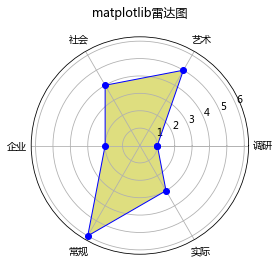

In [6]:
import numpy as np
import matplotlib.pyplot as plt
attr=['调研','艺术','社会','企业','常规','实际']
data=[1,5,4,2,6,3]
angle=np.linspace(0,2*np.pi,6,endpoint=False)

data=np.concatenate([data,[data[0]]])
angles=np.concatenate([angle,[angle[0]]])

fig=plt.figure()
ax=fig.add_subplot(111,polar=True)
ax.plot(angles,data,'bo-',linewidth=1)
ax.fill(angles,data,facecolor='y',alpha=0.5)
ax.set_thetagrids(angles*180/np.pi,attr,fontproperties='Microsoft Yahei')
ax.grid(True)
ax.set_title("matplotlib雷达图",va='bottom')     
plt.show()

In [8]:
from pyecharts import online

online() # needed for online viewing

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/rickie/anaconda3/lib/python3.6/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [9]:
from pyecharts import Radar
schema =[ ("销售", 6500), ("管理", 16000), ("信息技术", 30000), ("客服", 38000), ("研发", 52000), ("市场", 25000)]
v1 =[[4300, 10000, 28000, 35000, 50000, 19000]]
v2 =[[5000, 14000, 28000, 31000, 42000, 21000]]
radar =Radar()
radar.config(schema)
radar.add("预算分配", v1,is_splitline=True, is_axisline_show=True,label_color=["#4e79a7"])
radar.add("实际开销", v2,is_area_show=False,item_color="#b3e4a1")

In [15]:
from pyecharts import online

online() # needed for online viewing

In [25]:
from pyecharts import Pie

pie = Pie(    
    '数据化分析目前对主要技术的关注度', 
    title_pos='center',
)
# 定义名称、属性和值
da = {
    'name': '',
    'attr': ['数据分析', ''],    
    'value': [90, 10],    
    'redius': [30, 22],    
    'center': [30, 30],    
    'rosetype': None,    
    'label_pos': 'center',    
    'is_label_show': True,    
    'label_text_color': None,    
    'legend_top': 'bottom'
} 

dm = {
    'name': '',
    'attr': ['数据挖掘', ''],
    'value': [30, 70],
    'redius': [30, 22],
    'center': [50, 30],
    'rosetype': None,
    'label_pos': 'center',
    'is_label_show': True,
    'label_text_color': None,
    'legend_top': 'bottom'
}
excel = {
    'name': '',
    'attr': ['Excel', ''],
    'value': [70, 30],
    'redius': [30, 22],
    'center': [70, 30],
    'rosetype': None,
    'label_pos': 'center',
    'is_label_show': True,
    'label_text_color': None,
    'legend_top': 'bottom'
}

technologies=[da,dm,excel]

for technology in technologies:
    pie.add(technology['name'],
            technology['attr'],
            technology['value'],
            technology['redius'],
            technology['center'],
            technology['rosetype'],
            label_pos=technology['label_pos'],
            is_label_show=technology['is_label_show'],
            label_text_color=technology['label_text_color'],
            legend_top='center'
           )
pie.render('/Users/rickie/Desktop/pies.html')

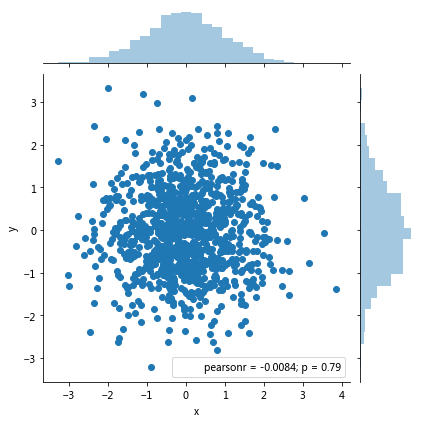

In [13]:
N=1000
import pandas as pd
x=np.random.randn(N)
y=np.random.randn(N)

df=pd.DataFrame({'x':x,'y':y})

import seaborn as sns
sns.jointplot(x='x',y='y',data=df,kind='scatter')
plt.show()

In [39]:
flights=sns.load_dataset('flights')
type(flights)
flight=flights.pivot('year','month','passengers')
sns.heatmap(flight)
# plt.show()
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


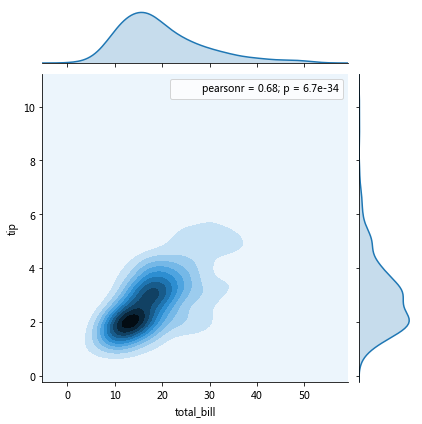

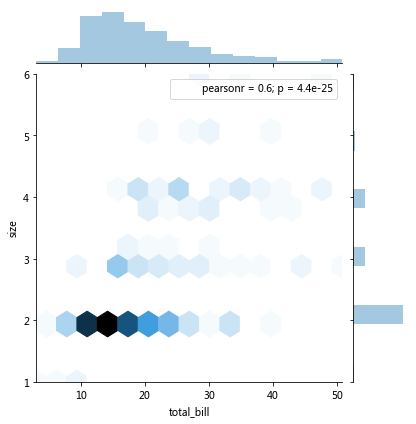

In [29]:
tips=sns.load_dataset('tips')
print(tips.head())
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')
sns.jointplot(x='total_bill',y='size',data=tips,kind='hex')
plt.show()

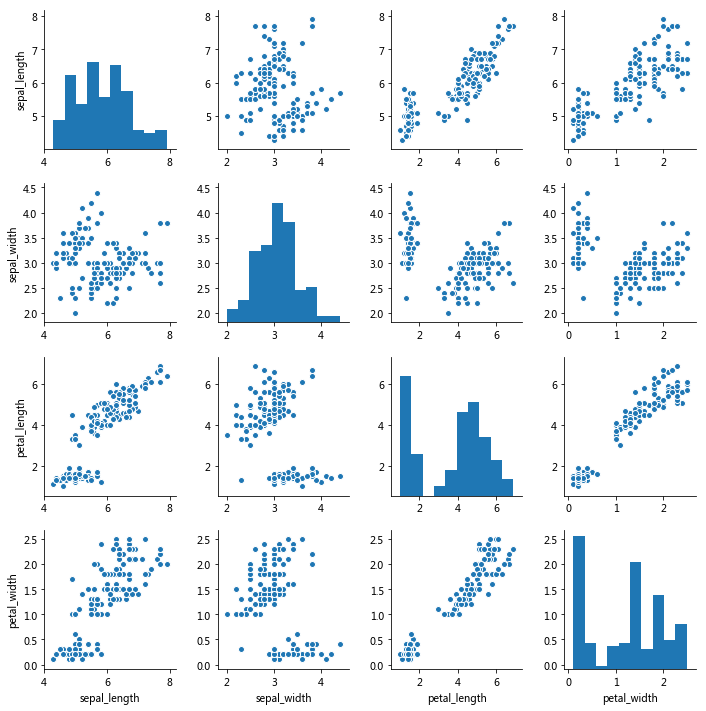

In [31]:
iris=sns.load_dataset('iris')
sns.pairplot(iris)
plt.show()